# Missing data

https://youtu.be/O5v4NrSCw_A?list=PLQVvvaa0QuDc-3szzjeP6N6b0aDrrKyL-

In [1]:
import quandl;
import pandas as pd;

import pickle;

import matplotlib.pyplot as plt;
from matplotlib import style;
style.use("ggplot");

In [2]:
api_key = open("quandlapikey.txt", "r").read();

def state_list():
    fiddy_states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states");
    return fiddy_states[0][0][1:];

def grap_initial_state_data_start_pct():
    states = state_list();
    main_df = pd.DataFrame();
    for ab in states:
        querry = "FMAC/HPI_" + ab;
        df = quandl.get(querry, authtoken = api_key);
        df.columns = [ab];        
        df[ab] = (df[ab] - df[ab][0]) / df[ab][0] * 100.0; # <-------
        if main_df.empty:
            main_df = df;
        else:
            main_df = main_df.join(df);

    pickle_out = open("./data/fiddy_states.pickle", "wb");
    pickle.dump(main_df, pickle_out);
    pickle_out.close();
    
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken = api_key);
    df.columns = ["US"];        
    df["US"] = (df["US"] - df["US"][0]) / df["US"][0] * 100.0; # <-------
    return df;

                    TX       TX1yr
Date                              
1975-01-31    0.000000         NaN
1975-02-28    0.951488         NaN
1975-03-31    2.701039         NaN
1975-04-30    5.276570         NaN
1975-05-31    6.099286         NaN
1975-06-30    4.882747         NaN
1975-07-31    4.067261         NaN
1975-08-31    4.011509         NaN
1975-09-30    4.272719         NaN
1975-10-31    4.606024         NaN
1975-11-30    5.261535         NaN
1975-12-31    5.891854    4.001836
1976-01-31    6.301948         NaN
1976-02-29    7.219763         NaN
1976-03-31    9.422551         NaN
1976-04-30   12.572041         NaN
1976-05-31   13.553547         NaN
1976-06-30   12.362672         NaN
1976-07-31   11.779576         NaN
1976-08-31   11.780492         NaN
1976-09-30   12.048459         NaN
1976-10-31   12.698906         NaN
1976-11-30   13.620130         NaN
1976-12-31   14.218217   11.464859
1977-01-31   14.742006         NaN
1977-02-28   16.188283         NaN
1977-03-31   19.5505

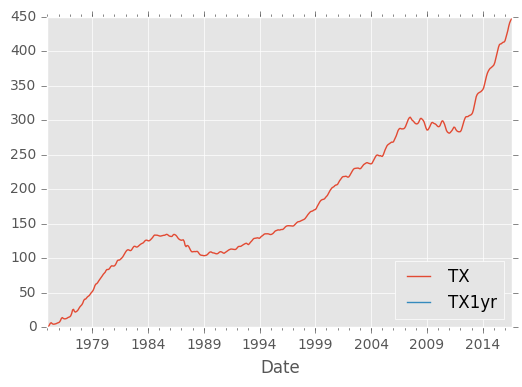

In [3]:
#grap_initial_state_data_start_pct(); 
HPI_data = pd.read_pickle("./data/fiddy_states.pickle");
HPI_data["TX1yr"] = HPI_data["TX"].resample("A").mean(); #why is it so ugly!!!
print(HPI_data[["TX", "TX1yr"]]); #now we have NaNs
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-

fig = plt.figure();
ax1 = plt.subplot2grid((1, 1), (0, 0));

HPI_data[["TX", "TX1yr"]].plot(ax = ax1);
plt.legend(loc = 4);
plt.show();

                    TX       TX1yr
Date                              
1975-12-31    5.891854    4.001836
1976-12-31   14.218217   11.464859
1977-12-31   29.395393   22.668530
1978-12-31   49.589010   40.861312
1979-12-31   74.325257   63.444913
1980-12-31   88.337712   83.742599
1981-12-31  106.500868   97.551822
1982-12-31  116.357036  112.956569
1983-12-31  125.891951  121.168797
1984-12-31  132.721428  129.847160
1985-12-31  131.928909  132.896144
1986-12-31  126.201357  130.979202
1987-12-31  109.241850  118.689100
1988-12-31  103.827664  107.385814
1989-12-31  107.436932  106.287863
1990-12-31  107.943262  107.568833
1991-12-31  113.218970  111.947485
1992-12-31  120.374178  118.549751
1993-12-31  128.917845  126.073119
1994-12-31  134.354694  133.375455
1995-12-31  141.369866  138.488227
1996-12-31  146.401394  145.178130
1997-12-31  155.571757  151.672269
1998-12-31  170.088314  164.229312
1999-12-31  187.993825  180.731572
2000-12-31  206.185035  199.561632
2001-12-31  217.3516

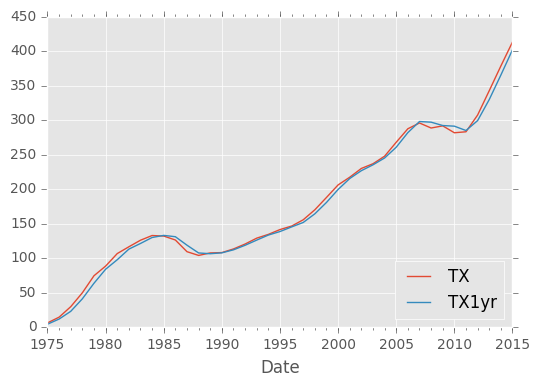

In [4]:
HPI_data.dropna(inplace = True); #ha! you have thought that it is procedure!
#it erases rows which contain NaN somewhere
print(HPI_data[["TX", "TX1yr"]]); #now we have not NaNs
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-

fig = plt.figure();
ax1 = plt.subplot2grid((1, 1), (0, 0));

HPI_data[["TX", "TX1yr"]].plot(ax = ax1);
plt.legend(loc = 4);
plt.show();

In [5]:
import math;
df = pd.DataFrame({"first":[1, float("nan"), float("nan")],
                  "second":[4, 5, float("nan")]});
print(df);

df.dropna(inplace = True, how = "all");
print(df);

   first  second
0    1.0     4.0
1    NaN     5.0
2    NaN     NaN
   first  second
0    1.0     4.0
1    NaN     5.0


In [6]:
df = pd.DataFrame({"first":[1, float("nan"), float("nan"), 7],
                  "second":[4, 5, float("nan"), 8]});
print(df);

df.fillna(inplace = True, method="ffill");
print(df);

   first  second
0    1.0     4.0
1    NaN     5.0
2    NaN     NaN
3    7.0     8.0
   first  second
0    1.0     4.0
1    1.0     5.0
2    1.0     5.0
3    7.0     8.0


In [7]:
df = pd.DataFrame({"first":[1, float("nan"), float("nan"), 7],
                  "second":[4, 5, float("nan"), 8]});
print(df);

df.fillna(inplace = True, method="bfill");
print(df);

   first  second
0    1.0     4.0
1    NaN     5.0
2    NaN     NaN
3    7.0     8.0
   first  second
0    1.0     4.0
1    7.0     5.0
2    7.0     8.0
3    7.0     8.0


In [8]:
df = pd.DataFrame({"first":[1, float("nan"), float("nan"), 7],
                  "second":[4, 5, float("nan"), 8]});
print(df);

df.fillna(value = -1, inplace = True);
print(df);

   first  second
0    1.0     4.0
1    NaN     5.0
2    NaN     NaN
3    7.0     8.0
   first  second
0    1.0     4.0
1   -1.0     5.0
2   -1.0    -1.0
3    7.0     8.0


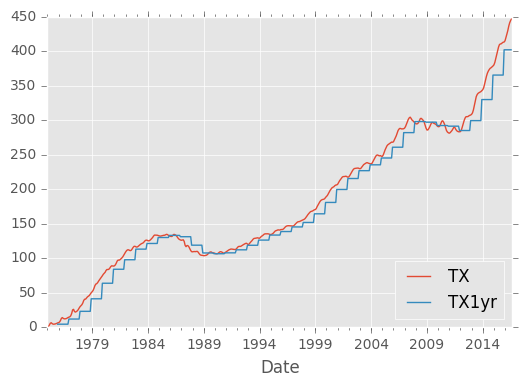

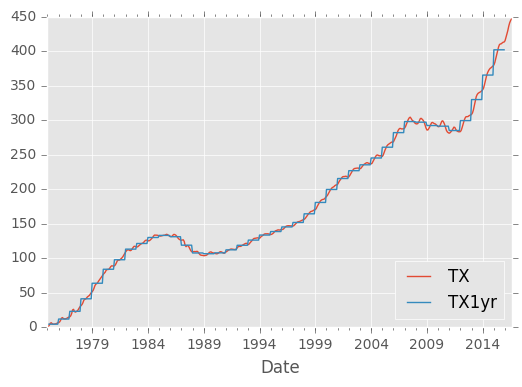

In [9]:
HPI_data = pd.read_pickle("./data/fiddy_states.pickle");
HPI_data["TX1yr"] = HPI_data["TX"].resample("A").mean(); #why is it so ugly!!!

HPI_data.fillna(inplace = True, method = "ffill"); # <-------
fig = plt.figure();
ax1 = plt.subplot2grid((1, 1), (0, 0));

HPI_data[["TX", "TX1yr"]].plot(ax = ax1);
plt.legend(loc = 4);
plt.show();

HPI_data = pd.read_pickle("./data/fiddy_states.pickle");
HPI_data["TX1yr"] = HPI_data["TX"].resample("A").mean(); #why is it so ugly!!!

HPI_data.fillna(inplace = True, method = "bfill"); # <-------
fig = plt.figure();
ax1 = plt.subplot2grid((1, 1), (0, 0));

HPI_data[["TX", "TX1yr"]].plot(ax = ax1);
plt.legend(loc = 4);
plt.show();

In [10]:
HPI_data = pd.read_pickle("./data/fiddy_states.pickle");
HPI_data["TX1yr"] = HPI_data["TX"].resample("A").mean(); #why is it so ugly!!!

HPI_data.fillna(inplace = True, value = -99999, limit = 10); # <-------
print(HPI_data["TX1yr"]);
print(HPI_data.isnull().values.sum()); # calculates NaN's count

Date
1975-01-31   -99999.000000
1975-02-28   -99999.000000
1975-03-31   -99999.000000
1975-04-30   -99999.000000
1975-05-31   -99999.000000
1975-06-30   -99999.000000
1975-07-31   -99999.000000
1975-08-31   -99999.000000
1975-09-30   -99999.000000
1975-10-31   -99999.000000
1975-11-30             NaN
1975-12-31        4.001836
1976-01-31             NaN
1976-02-29             NaN
1976-03-31             NaN
1976-04-30             NaN
1976-05-31             NaN
1976-06-30             NaN
1976-07-31             NaN
1976-08-31             NaN
1976-09-30             NaN
1976-10-31             NaN
1976-11-30             NaN
1976-12-31       11.464859
1977-01-31             NaN
1977-02-28             NaN
1977-03-31             NaN
1977-04-30             NaN
1977-05-31             NaN
1977-06-30             NaN
                  ...     
2014-04-30             NaN
2014-05-31             NaN
2014-06-30             NaN
2014-07-31             NaN
2014-08-31             NaN
2014-09-30             